# Case Study: "How does a bike share navigate speedy success?"
## Google Data Analytics Capstone
### Author: Scottie Szewczyk

# Overview
In this document, we will perform an analysis for a fictional rideshare bicycle company called Cyclistic. The goal of this analysis is to understand how annual Members and Guest riders used the company’s bikes differently over the time period of November 2021 to October 2022.

**If you would like to understand the background scenario for this project, please read the “Scenario” section. If you just want to see the analysis itself, feel free to skip directly to the “Data” section.**

## Scenario

*You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.*

### Characters and teams

-   Cyclistic: A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.

-   Lily Moreno: The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels. 

-   Cyclistic marketing analytics team: A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals — as well as how you, as a junior data analyst, can help Cyclistic achieve them.

-   Cyclistic executive team: The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.

### About the company

*In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime. Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members. Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs. Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.*

## Business Goal

In this document, we will answer the following question:

"How do annual members and casual riders use Cyclistic bikes differently?"

**That is, we will compare the riding behaviors of Cyclistic members and guests.**

## Data

### Data source

-   I analyzed Cyclistic’s monthly trip data from November 2021 - October 2022, made available from Motivate International Inc., under the license found here: <https://ride.divvybikes.com/data-license-agreement>

-   Cyclistic is a fictional company, but I will treat the data as if it is first-party data collected by Cyclistic.

### Data credibility

Using Google’s **ROCCC** checklist, the data is:

-   **R**eliable: Since we are treating the data as if it is first-party data from Cyclistic, we can assume that it is mostly reliable. Many station names and IDs in the datasets are left blank. We will assume that the data are otherwise correct in spite of these blanks.

-   **O**riginal: Again, since we are using  first-party data, then the data is original.

-   **C**omprehensive: To protect user privacy, the data do not identify specific users (i.e. a person taking two rides is indistinguishable from two people taking one ride each), limiting the inferences that we can make.

-   **C**urrent: Cyclistic provides clearly-labeled monthly datasets containing ride data from each month, so the data is current.

-   **C**ited: In this case, “Cited” means “properly vetted”. Since this is first-party data, then we can consider it cited as well.

### Description of the data

For each month, Cyclistic provides a dataset containing the following information on each individual use of a Cyclistic bicycle:

-   Ride ID

-   Type of Bike (Classic, Electric, or Docked)

-   Date/time that the ride started; Date/time that the ride ended

-   Start station (including the ID of the station); End station (inluding the ID of the station)

-   Starting and Ending Latitude; Starting and Ending Longitude

-   Rider type (Member or Casual (AKA "Guest")

## Setup

### Import libraries and create dataset

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import all datasets. Note the directions of the slash marks
nov2021 = pd.read_csv("data/202111-divvy-tripdata.csv")
dec2021 = pd.read_csv("data/202112-divvy-tripdata.csv")
jan2022 = pd.read_csv("data/202201-divvy-tripdata.csv")
feb2022 = pd.read_csv("data/202202-divvy-tripdata.csv")
mar2022 = pd.read_csv("data/202203-divvy-tripdata.csv")
apr2022 = pd.read_csv("data/202204-divvy-tripdata.csv")
may2022 = pd.read_csv("data/202205-divvy-tripdata.csv")
jun2022 = pd.read_csv("data/202206-divvy-tripdata.csv")
jul2022 = pd.read_csv("data/202207-divvy-tripdata.csv")
aug2022 = pd.read_csv("data/202208-divvy-tripdata.csv")
sep2022 = pd.read_csv("data/202209-divvy-publictripdata.csv")
oct2022 = pd.read_csv("data/202210-divvy-tripdata.csv")

In [3]:
# Join all twelve months of data vertically into an 'allmonths' dataset. The 'ignore_index'
# argument removes the indices from the individual month datasets and assigns new indices
# to all observations.
allmonths = pd.concat([nov2021, dec2021, jan2022, feb2022, mar2022, apr2022, may2022, jun2022, jul2022,
                       aug2022, sep2022, oct2022], ignore_index = False)

## Data cleaning

First, we will create the ridelength column, which is the length of time for each ride.

We will also remove all observations with erroneous values of ridelength. That is, we will remove all values of ridelength <= 0 and rides that took longer than 1 day (or 1440 minutes). 

In [4]:
# Convert the 'started_at' and 'ended_at' columns to datetime64 types.
allmonths['started_at'] = pd.to_datetime(allmonths['started_at'])
allmonths['ended_at'] = pd.to_datetime(allmonths['ended_at'])

# Calculate the length of each ride in minutes.
allmonths['ridelength'] = (allmonths['ended_at'] - allmonths['started_at']).dt.total_seconds()/60

# Filter the data to only include observations where the 'ridelength' was greater than
# 0 seconds and less than 1440 seconds (AKA 24 hours).
allmonths = allmonths[(allmonths['ridelength'] > 0) & (allmonths['ridelength'] < 1440)]

In [5]:
# Check the minimum ridelength.
allmonths['ridelength'].min()

0.016666666666666666

In [6]:
# Check the maximum ridelength.
allmonths['ridelength'].max()

1439.95

The ridelength values are now all between 0 and 1440 minutes.

Next, we will identify the times that a ride occurred across different intervals: the day of the week (day), whether the ride was on a weekday or weekend (wkend_wkday), the time of day during which a ride started (time_of_day), and the month that a ride happened in (month).

In [7]:
# Identify the day of the week that a ride was taken.
allmonths['day_of_week'] = allmonths['started_at'].dt.day_name()

In [8]:
# Identify whether the ride was on a weekday or the weekend.
allmonths['wkday_weekend'] = allmonths['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

In [9]:
# Identify the time of day that a ride occurred. 
allmonths['time_of_day'] = allmonths['started_at'].dt.hour.apply(
    lambda x: 'Mid-night' if 0 <= x < 6
    else 'Morning' if 6 <= x < 12
    else 'Afternoon' if 12 <= x < 18
    else 'Evening'
    )

In [10]:
# Identify the month that a ride occured.
allmonths['Month_Year'] = allmonths['started_at'].dt.strftime('%b %Y')

Finally, we will rename the membership and bike type values for clarity. 

In [11]:
# Determine the unique values of the 'member_casual' and 'rideable_type' columns to see
# if there are any inappropriate values (there are none).
print(allmonths['member_casual'].unique())
print(allmonths['rideable_type'].unique())

['casual' 'member']
['electric_bike' 'classic_bike' 'docked_bike']


In [12]:
# Change the format of the 'member_casual' values for readability.
allmonths['member_casual'] = allmonths['member_casual'].apply(
    lambda x: 'Member' if x == 'member'
    else 'Guest'
    )

In [13]:
# Change the format of the 'rideable_type' values for readability.
allmonths['rideable_type'] = allmonths['rideable_type'].apply(
    lambda x: 'Electric' if x == 'electric_bike'
    else 'Classic' if x == 'classic_bike'
    else 'Docked'
    )

# Data Analysis

Our analysis will focus on the difference between the two types of riders: Members and Guests.

## General differences

First, we will examine the general differences between the rider types — that is, the differences between Members and Guests without respect to time. 

### Total Rides

We will start by simply comparing the number of rides taken by each rider type.

In [14]:
# Calculate the number of rides by membership type.
num_rides = allmonths['member_casual'].value_counts().reset_index()
num_rides

,member_casual,count
0,Member,3401675
1,Guest,2348089


Text(0.8, 2450000, '2.3 million')

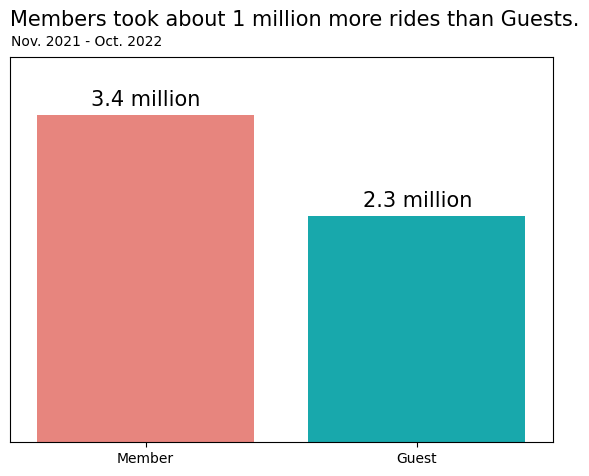

In [15]:
#Define colors for 'member_casual'
mem_cas_colors = ["#F8766D", "#00BFC4"]

#Bar plot: Number of rides by membership group
fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(data = num_rides, x = 'member_casual', y ='count', hue = 'member_casual', palette = mem_cas_colors)

ax.set_title("Members took about 1 million more rides than Guests.\n", fontsize = 15,loc = 'left')
fig.suptitle('Nov. 2021 - Oct. 2022', x = 0.235, y = 0.925, fontsize = 10)
ax.set_xlabel('')
ax.set_ylabel('')

ax.set_ylim(0, 4000000)
ax.set_yticks([])

ax.annotate('3.4 million', xy=(-0.2, 3500000),  fontsize = 15)
ax.annotate('2.3 million', xy=(0.8, 2450000),  fontsize = 15)

Over the course of the year (Nov. 2021 - Oct. 2022), there were about 1 million more rides taken by Members than by Guests.

It is important to note that these numbers refer to the *number of rides taken*, NOT the number of riders. It is possible, for example, that the two groups are composed of the same number of people.

### Average ridelength

Next, we will compare the average ridelength between the two groups.

In [16]:
# Calculate the mean, median, and standard deviation of 'ridelength' for both membership types.
allmonths.groupby('member_casual')['ridelength'].agg(['mean', 'median', 'std'])

,mean,median,std
member_casual,,,
Guest,22.036005,13.133333,39.550974
Member,12.408028,8.833333,18.944904


In [17]:
# Creating a dataframe to display the median ridelength by membership type.
# Using the full dataset to create the plot takes way too long.
median_ridelength_membership = allmonths.groupby('member_casual')['ridelength'].median()

ridelength_by_group = median_ridelength_membership.to_frame()

ridelength_by_group.reset_index(inplace=True)
ridelength_by_group

,member_casual,ridelength
0,Guest,13.133333
1,Member,8.833333


Text(0.85, 9, '8.8 min.')

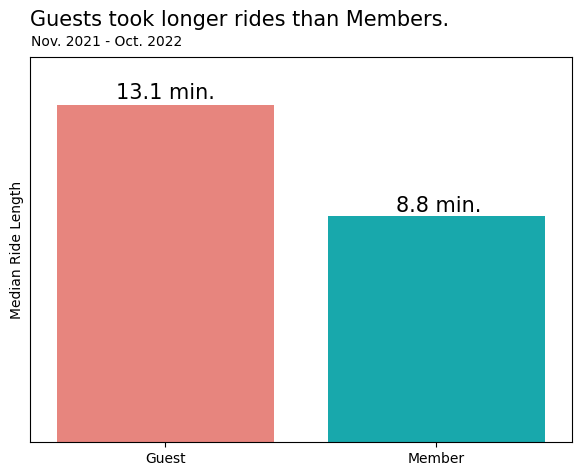

In [18]:
# Bar plot: Median ridelength by membership group
fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(data = ridelength_by_group, x = 'member_casual', y ='ridelength', hue = 'member_casual', palette = mem_cas_colors) \
                            .set(xlabel='', ylabel='')

ax.set_title("Guests took longer rides than Members.\n", fontsize = 15, loc = 'left')
fig.suptitle('Nov. 2021 - Oct. 2022', x = 0.235, y = 0.925, fontsize = 10)

ax.set_xlabel('')
ax.set_ylabel('Median Ride Length')

ax.set_ylim(0, 15)
ax.set_yticks([])

ax.annotate('13.1 min.', xy=(-0.18, 13.4),  fontsize = 15)
ax.annotate('8.8 min.', xy=(0.85, 9),  fontsize = 15)

Guest riders’ median ride length is **almost 50% longer** as that of Members. This difference is preserved, but more pronounced, when comparing the mean ride lengths.

Also, Guest riders’ ride lengths are also much **more variable** than that of Members: the SD of Guests' rides is 39.6 minutes, compared to Members' SD of 18.9 minutes.

### Type of bike

Next, we will compare the bike types that Members and Guests tend to use.

In [19]:
#Calculate the percentage of rides using a particular bike for both membership types.
bikes_by_member = allmonths.groupby('member_casual')['rideable_type'].value_counts(normalize = True)
bikes_by_member

member_casual  rideable_type
Guest          Electric         0.542219
               Classic          0.381055
               Docked           0.076726
Member         Classic          0.511433
               Electric         0.488567
Name: proportion, dtype: float64

In [20]:
#Creating a dataframe for the 'bike type' stacked bar chart
bikes_by_member_dataframe = bikes_by_member.to_frame(name = 'proportions')

bikes_by_member_dataframe['percent'] = bikes_by_member_dataframe['proportions'] * 100

bikes_by_member_dataframe.reset_index(inplace=True)


bikes_member_pivot = pd.pivot_table(bikes_by_member_dataframe, index = 'member_casual', values = 'percent', columns = 'rideable_type')

bikes_member_pivot

rideable_type,Classic,Docked,Electric
member_casual,,,
Guest,38.105455,7.672622,54.221923
Member,51.143275,NaN,48.856725


Text(0.91, 25, '51.1%')

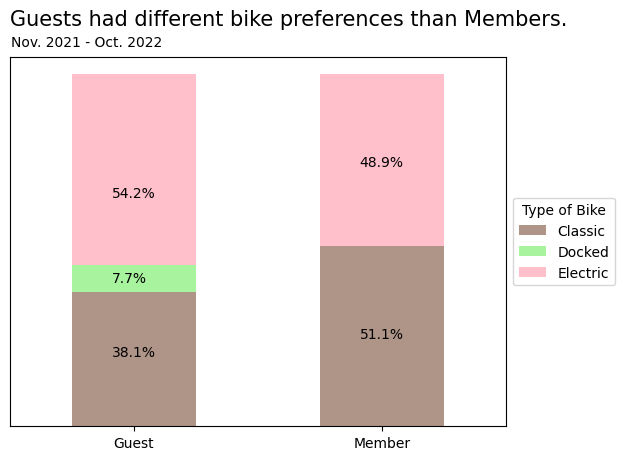

In [21]:
#Stacked bar chart: percentage of rides using a particular bike by membership type.
bike_type_bar = bikes_member_pivot.plot(kind = 'bar', stacked = True, color = ['#AF9488', '#A8F49E', 'pink'], \
                                        xlabel = '', ylabel = '')

plt.title('Guests had different bike preferences than Members.\n', loc = 'left', fontsize = 15)
plt.suptitle('Nov. 2021 - Oct. 2022', x = 0.245, y = 0.925, fontsize = 10)

plt.xticks(rotation=0)
plt.tick_params(left = False, labelleft = False) 

plt.legend(['Classic', 'Docked', 'Electric'], bbox_to_anchor=(1, 0.5), loc='center left', title = 'Type of Bike')

plt.annotate('54.2%', xy = (-0.09, 65))
plt.annotate('7.7%', xy = (-0.09, 41))
plt.annotate('38.1%', xy = (-0.09, 20))

plt.annotate('48.9%', xy = (.91, 74))
plt.annotate('51.1%', xy = (.91, 25))

Guests have a clear order of favorites:
1. Electric

2. Classic

3. Docked (although this category was rarely used).

Members, on the other hand, are nearly evenly split between Classic and Electric bikes and do not use Docked bikes at all.

## Differences over the day

Next, we will examine the time(s) of day that the two groups tend to ride.

### Time of day

The times of day are defined as follows:

-   Mid-Night: 12 A.M. - 6 A.M.

-   Evening: 6 P.M. - 12 A.M.

-   Afternoon: 12 P.M. - 6 P.M.

-   Morning: 6 A.M. - 12 P.M.

In [22]:
# Calculate the percentage of rides by time of day for each membership group
time_of_day_table = allmonths.groupby('member_casual')['time_of_day'].value_counts(normalize = True)

#Creating a dataframe for the 'time of day' stacked bar chart.
time_of_day_dataframe = time_of_day_table.to_frame(name = 'proportions')

time_of_day_dataframe['proportions'] = time_of_day_dataframe['proportions'] * 100

time_of_day_dataframe.reset_index(inplace=True)

time_of_day_pivot = pd.pivot_table(time_of_day_dataframe, index = 'member_casual', values = 'proportions', columns = 'time_of_day')
time_of_day_pivot

time_of_day,Afternoon,Evening,Mid-night,Morning
member_casual,,,,
Guest,45.341297,30.431598,5.456522,18.770583
Member,42.600954,26.601248,3.588967,27.208831


Text(0.91, 97, '3.6%')

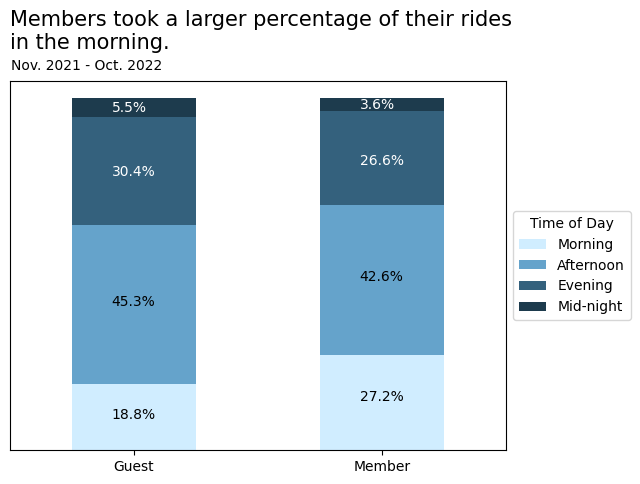

In [23]:
# Stacked bar chart: percentage of each membership group's rides started during each part of the day.
time_of_day_bar = time_of_day_pivot[['Morning', 'Afternoon', 'Evening', 'Mid-night']].plot(kind = 'bar', stacked = True,
                                                                        color = ['#D0EDFF', '#65A3CB', '#34617D', '#1D3B4D'],
                                                                        xlabel = '', ylabel = '')

plt.title('Members took a larger percentage of their rides\nin the morning.\n', loc = 'left', fontsize = 15)
plt.suptitle('Nov. 2021 - Oct. 2022', x = 0.245, y = 0.925, fontsize = 10)

plt.xticks(rotation=0)
plt.tick_params(left = False, labelleft = False)
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', title = 'Time of Day')

plt.annotate('18.8%', xy = (-0.09, 9))
plt.annotate('45.3%', xy = (-0.09, 41))
plt.annotate('30.4%', xy = (-0.09, 78), color = 'white')
plt.annotate('5.5%', xy = (-0.09, 96), color = 'white')

plt.annotate('27.2%', xy = (.91, 14))
plt.annotate('42.6%', xy = (.91, 48))
plt.annotate('26.6%', xy = (.91, 81), color = 'white')
plt.annotate('3.6%', xy = (.91, 97), color = 'white')

The largest difference is that Members take a much larger percentage of their rides in the **morning** than do Guests.

## Differences over the week

Next, we will compare how riders differ over each day of the week and on weekends vs. weekdays.

### Rides by day of week

First, we will see the days of the week that riders prefer to ride.

In [24]:
# Calculate the percentage of rides taken on each day of the week for each membership group
day_of_week_percent = allmonths.groupby('member_casual')['day_of_week'].value_counts(normalize = True)
day_of_week_percent

member_casual  day_of_week
Guest          Saturday       0.206236
               Sunday         0.168698
               Friday         0.144035
               Thursday       0.130476
               Monday         0.121115
               Wednesday      0.117069
               Tuesday        0.112371
Member         Thursday       0.156547
               Wednesday      0.155667
               Tuesday        0.153912
               Monday         0.143916
               Friday         0.140099
               Saturday       0.133536
               Sunday         0.116324
Name: proportion, dtype: float64

In [25]:
#Creating the dataframe for the side-by-side barplot
day_of_week_percent_dataframe = day_of_week_percent.to_frame(name = 'proportions')

day_of_week_percent_dataframe['proportions'] = day_of_week_percent_dataframe['proportions'] * 100

day_of_week_percent_dataframe.reset_index(inplace=True)

In [26]:
#Calculating the standard deviations of the daily percentages
day_of_week_percent_dataframe.groupby('member_casual')['proportions'].std()

member_casual
Guest     3.392757
Member    1.456795
Name: proportions, dtype: float64

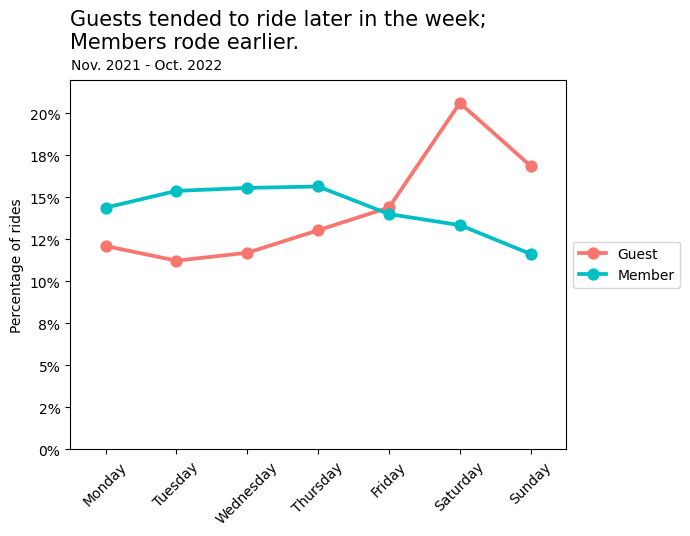

In [27]:
# Line/Point plot: percentage of each membership group's rides during each day of the week.
daily_percentage_bar = sns.pointplot(data = day_of_week_percent_dataframe, x = 'day_of_week', y = 'proportions', hue = 'member_casual', palette = mem_cas_colors, \
                                   order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.title('Guests tended to ride later in the week;\nMembers rode earlier.\n', loc = 'left', fontsize = 15)
plt.suptitle('Nov. 2021 - Oct. 2022', x = 0.245, y = 0.925, fontsize = 10)

plt.xlabel('')
plt.xticks(rotation=45)
plt.ylabel('Percentage of rides')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda value, _: f"{value:.0f}%"))
plt.ylim(0, 22)

plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', title = '')

Guests riders take a larger percentage of their rides later in the week, especially on Saturday and Sunday, and their daily percentages of rides are more variable throughout the week (SD of the daily percentages = 3.4%).

Members take a smaller percentage of their rides on Saturday and Sunday but also spread out their rides more evenly throughout the week (SD of the daily percentages = 1.5%).

### Ridelength by day of week

We will also compare the median ridelength values for each day of the week.

In [28]:
# Calculate the median ridelength on each day of the week for each membership group.
day_of_week_ridelength = allmonths.groupby(['member_casual', 'day_of_week'])['ridelength'].median()
day_of_week_ridelength

member_casual  day_of_week
Guest          Friday         12.566667
               Monday         13.016667
               Saturday       15.050000
               Sunday         15.116667
               Thursday       11.833333
               Tuesday        11.716667
               Wednesday      11.600000
Member         Friday          8.700000
               Monday          8.466667
               Saturday        9.866667
               Sunday          9.566667
               Thursday        8.616667
               Tuesday         8.466667
               Wednesday       8.583333
Name: ridelength, dtype: float64

In [29]:
# Creating the dataframe for the pointplot
day_of_week_ridelength_dataframe = day_of_week_ridelength.to_frame(name = 'ridelength')

day_of_week_ridelength_dataframe.reset_index(inplace=True)

In [30]:
# Calculating the standard deviations of the daily median ridelengths.
day_of_week_ridelength_dataframe.groupby('member_casual')['ridelength'].std()

member_casual
Guest     1.518632
Member    0.573707
Name: ridelength, dtype: float64

(0.0, 16.0)

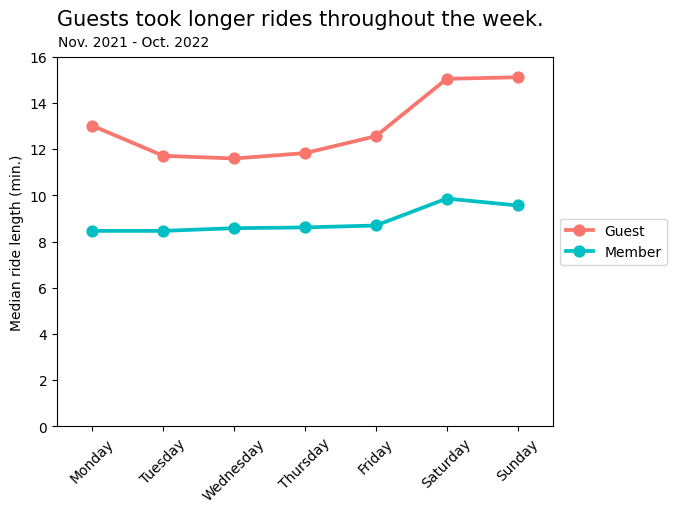

In [31]:
# Line/Point plot: Median ride length of each membership group during each day of the week.
daily_ridelength_pointplot = sns.pointplot(data = day_of_week_ridelength_dataframe, x = 'day_of_week', y = 'ridelength', hue = 'member_casual', palette = mem_cas_colors, \
                                           order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.title('Guests took longer rides throughout the week.\n', loc = 'left', fontsize = 15)
plt.suptitle('Nov. 2021 - Oct. 2022', x = 0.245, y = 0.925, fontsize = 10)

plt.xlabel('')
plt.xticks(rotation=45)

plt.ylabel('Median ride length (min.)')
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', title = '')
plt.ylim(0, 16)

Guests’ median ride length is consistently longer and more variable than that of Members over the course of the week.

### Rides on weekdays vs. weekends

We will also make the same comparisons between weekdays and weekends.

"Weekends" refer to Saturday and Sunday, and "Weekdays" refer to Monday - Friday.

In [32]:
#Calculating the percentage of rides taken on each part of the week by each membership group.
weekpart_table = allmonths.groupby('member_casual')['wkday_weekend'].value_counts(normalize = True)

#Creating a dataframe for the 'part of the week' stacked bar chart.
weekpart_dataframe = weekpart_table.to_frame(name = 'proportions')

weekpart_dataframe['proportions'] = weekpart_dataframe['proportions'] * 100
weekpart_dataframe.reset_index(inplace=True)

weekpart_pivot = pd.pivot_table(weekpart_dataframe, index = 'member_casual', values = 'proportions', columns = 'wkday_weekend')
weekpart_pivot

wkday_weekend,Weekday,Weekend
member_casual,,
Guest,62.506617,37.493383
Member,75.014045,24.985955


Text(0.91, 40, '25.0%')

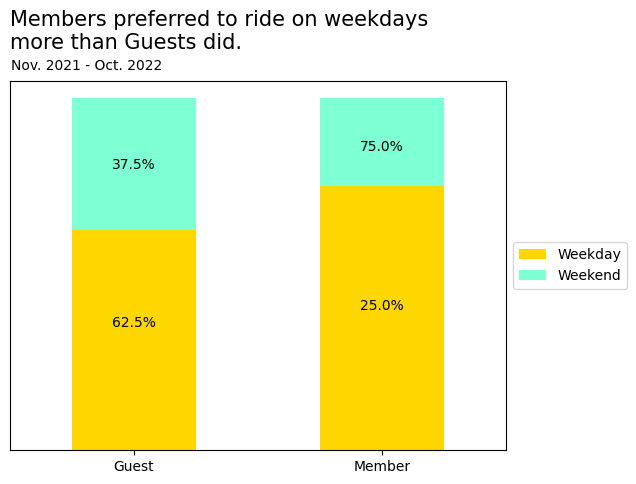

In [33]:
# Stacked bar chart: percentage of each membership group's rides started during each part of the week.
weekpart_percent_bar = weekpart_pivot.plot(kind = 'bar', stacked = True, color = ['gold', 'aquamarine'])

plt.title('Members preferred to ride on weekdays\nmore than Guests did.\n', loc = 'left', fontsize = 15)
plt.suptitle('Nov. 2021 - Oct. 2022', x = 0.245, y = 0.925, fontsize = 10)

plt.xlabel('')
plt.xticks(rotation=0)

plt.tick_params(left = False, labelleft = False)

plt.legend(['Weekday', 'Weekend'], bbox_to_anchor=(1, 0.5), loc='center left', title = '')

plt.annotate('62.5%', xy = (-0.09, 35))
plt.annotate('37.5%', xy = (-0.09, 80))

plt.annotate('75.0%', xy = (.91, 85))
plt.annotate('25.0%', xy = (.91, 40))

Consistent with what we saw with the days of the week, Members take a larger percentage of their rides during **weekdays** than do Guests.

If riders spread their rides evenly throughout the week, we would expect them to take about 29% (2 out of 7) of their rides on weekends. The results, however, show that Guests tend to prefer **weekends**, while Members tend to slightly prefer **weekdays.**

### Ridelength on weekdays vs. weekends

In [34]:
#Calculating the median ridelength during each part of the week for both membership groups.
weekpart_ridelength = allmonths.groupby(['member_casual', 'wkday_weekend'])['ridelength'].median()

#Creating the dataframe for the 'weekpart' side-by-side barplot
weekpart_ridelength_dataframe = weekpart_ridelength.to_frame(name = 'ridelength')

weekpart_ridelength_dataframe.reset_index(inplace=True)
weekpart_ridelength_dataframe

,member_casual,wkday_weekend,ridelength
0,Guest,Weekday,12.133333
1,Guest,Weekend,15.083333
2,Member,Weekday,8.566667
3,Member,Weekend,9.733333


Text(1.08, 9.9, '9.7 min.')

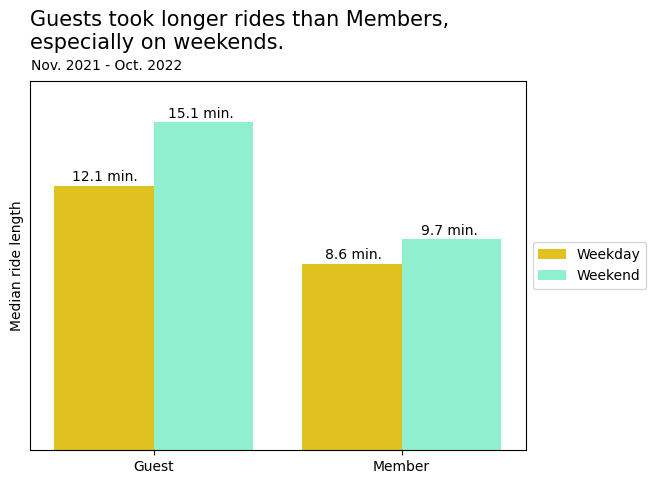

In [35]:
#Bar plot: Median ridelength by part of week and membership group
weekpart_ridelength_bar = sns.barplot(data = weekpart_ridelength_dataframe, x = 'member_casual', y = 'ridelength',
                                      hue = 'wkday_weekend', palette = ['gold', 'aquamarine'])

plt.title('Guests took longer rides than Members,\nespecially on weekends.\n', loc = 'left',
          fontsize = 15)
plt.suptitle('Nov. 2021 - Oct. 2022', x = 0.245, y = 0.925, fontsize = 10)

plt.xlabel('')

plt.ylabel('Median ride length')
plt.tick_params(left = False, labelleft = False)
plt.ylim(0, 17)

plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', title = '')

plt.annotate('12.1 min.', xy=(-0.33, 12.4),  fontsize = 10)
plt.annotate('15.1 min.', xy=(0.06, 15.3),  fontsize = 10)

plt.annotate('8.6 min.', xy=(0.69, 8.8),  fontsize = 10)
plt.annotate('9.7 min.', xy=(1.08, 9.9),  fontsize = 10)

Guests have **longer median ride lengths** than Members during both parts of the week, and this difference becomes **more pronounced on weekends**.


## Differences over the year

Finally, we will examine how the groups differ over each month of November 2021 to October 2022.

### Rides by month

We will count the number of rides taken each month.

In [36]:
#Calculating the number of rides during each month
year_ride_table = allmonths.groupby('member_casual')['Month_Year'].value_counts()/100000

#Creating the dataframe for the monthly rides pointplot
year_ride_dataframe = year_ride_table.to_frame(name = 'rides')

year_ride_dataframe.reset_index(inplace=True)
year_ride_dataframe

,member_casual,Month_Year,rides
0,Guest,Jul 2022,4.05237
1,Guest,Jun 2022,3.68141
2,Guest,Aug 2022,3.58241
3,Guest,Sep 2022,2.96133
4,Guest,May 2022,2.79801
5,Guest,Oct 2022,2.08639
6,Guest,Apr 2022,1.26121
7,Guest,Nov 2021,1.06735
8,Guest,Mar 2022,0.89647
9,Guest,Dec 2021,0.69594


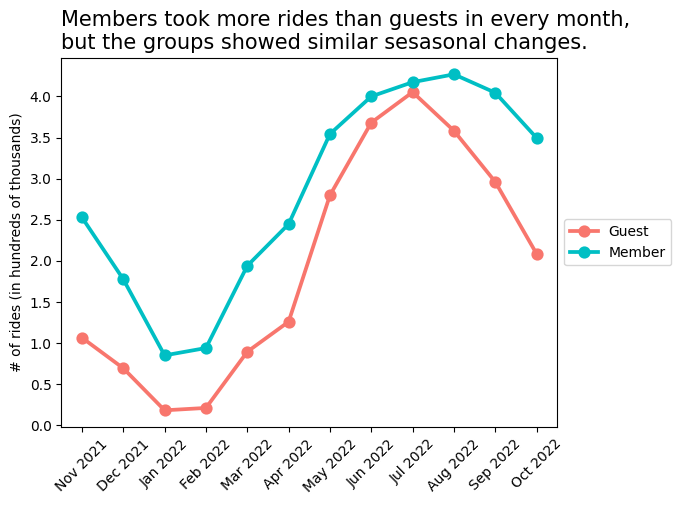

In [37]:
# Line/Point plot: number of rides during each month
rides_monthly_pointplot = sns.pointplot(data = year_ride_dataframe, x = 'Month_Year', y = 'rides',
                                        hue = 'member_casual', palette = mem_cas_colors,
                                        order = ['Nov 2021', 'Dec 2021', 'Jan 2022', 'Feb 2022',
                                                 'Mar 2022', 'Apr 2022', 'May 2022', 'Jun 2022',
                                                 'Jul 2022', 'Aug 2022', 'Sep 2022', 'Oct 2022'])
plt.title('Members took more rides than guests in every month,\nbut the groups showed similar sesasonal changes.',
          loc = 'left', fontsize = 15)
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('# of rides (in hundreds of thousands)')

plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', title = '')

Members took more rides than Guests riders every month.

Also, Guests and Members show remarkably similar month-to-month changes (i.e. the shapes of the two curves are very similar). However, Guests showed greater increases in rides from Apr. 2022 - Jul. 2022 and greater decreases from Jul. 2022 - Oct. 2022.

### Ridelength by month

We will also compare the median ridelengths for each month.

In [38]:
# Calculate the median ridelength over the year for each membership group.
year_ridelength = allmonths.groupby(['member_casual', 'Month_Year'])['ridelength'].median()

#Creating the dataframe for the monthly median ridelength pointplot
year_ridelength_dataframe = year_ridelength.to_frame(name = 'ridelength')

year_ridelength_dataframe.reset_index(inplace=True)
year_ridelength_dataframe

,member_casual,Month_Year,ridelength
0,Guest,Apr 2022,13.800000
1,Guest,Aug 2022,12.950000
2,Guest,Dec 2021,10.933333
3,Guest,Feb 2022,10.866667
4,Guest,Jan 2022,10.083333
5,Guest,Jul 2022,14.016667
6,Guest,Jun 2022,14.316667
7,Guest,Mar 2022,14.183333
8,Guest,May 2022,15.250000
9,Guest,Nov 2021,11.233333


In [39]:
#Calculating the standard deviations of the monthly median ridelengths.
year_ridelength_dataframe.groupby('member_casual')['ridelength'].std()

member_casual
Guest     1.748272
Member    0.994821
Name: ridelength, dtype: float64

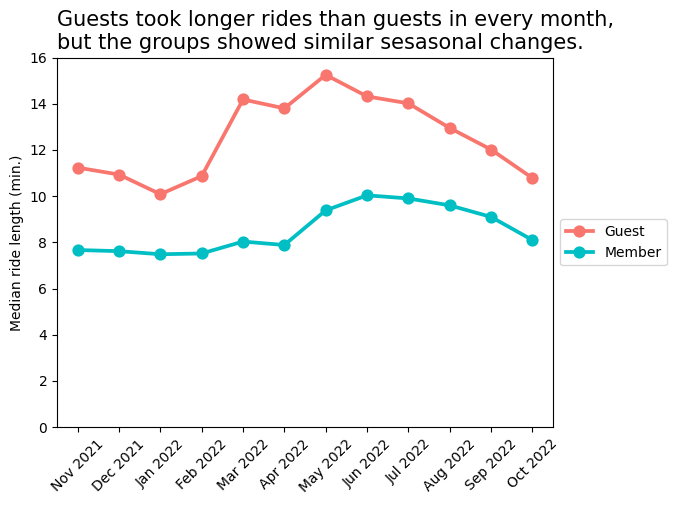

In [40]:
#Line/Point plot: median ridelength for each month
ridelength_monthly_pointplot = sns.pointplot(data = year_ridelength_dataframe, x = 'Month_Year', y = 'ridelength',
                                             hue = 'member_casual', palette = mem_cas_colors,
                                             order = ['Nov 2021', 'Dec 2021', 'Jan 2022', 'Feb 2022',
                                                      'Mar 2022', 'Apr 2022', 'May 2022', 'Jun 2022',
                                                      'Jul 2022', 'Aug 2022', 'Sep 2022', 'Oct 2022'])
plt.title('Guests took longer rides than guests in every month,\nbut the groups showed similar sesasonal changes.',
          loc = 'left', fontsize = 15)

plt.xlabel('')
plt.xticks(rotation=45)

plt.ylabel('Median ride length (min.)')
plt.ylim(0, 16)

plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', title = '')

Guests maintained a greater mean ride length than Members throughout the year, and their monthly median ride lengths were almost twice as variable. The standard deviations of of the monthly median ride lengths were:

-   Casual: 1.75 min.

-   Member: 1 min.

However, the rough similarity of the shapes of the two curves suggests that the two groups follow a somewhat similar pattern over the course of the year.

## Summary

-   During every month of the year, Members took **more rides** than Guests.

-   Members were evenly split between Classic and Electric bikes; whereas Guests preferred Electric bikes, followed by Classic bikes, and then Docked bikes.

-   In general, Guests tended to take **longer rides** than Members, and their rides were **more variable** in length. This pattern holds over the course of the week and over the entire year. The difference in ride length between the two groups **increased during the weekend**.

-   Members took a larger percentage of their rides in the **morning** compared to Guests riders and seemed to slightly prefer riding on **weekdays**; whereas Guests riders took a larger percentage of their rides on **weekends**.

## Remark

It is plausible that the differences between the two groups can be attributed to a large proportion of Members using Cyclistic bikes to travel to work. This fact would account for Members’ taking more and shorter rides that are less variable in duration and for Members’ relative preference to ride during mornings and weekdays. In contrast, Guests would have a much larger proportion of riders using Cyclistic bikes for leisure. Survey data is needed to test this hypothesis.

## Recommendations

1.  Commission a survey of Members and Guests that can be sent to riders’ emails or phones. The survey could ask riders about their reasons for using Cyclistic bikes and what would convince them to continue or begin memberships.

2.  Start a promotion for new members where longer rides are charged at half-price. The goal with this promotion is to cater to Guests’ tendency for longer rides in order to convince them to start memberships.

3.  Sell weekend or weekly passes to Guests to encourage more regular ridership.